COMBINE sammanställningsresultat för 2020-2024

In [219]:
# years = range(2022, 2024)
# files = [f"data/yh-sokande-{year}-behorighet-reell-kompetens.xlsx" for year in years]

# df_list = []

# for file in files:
#     year = file.split('-')[-1].split('.')[0]  # Extract year from filename
#     try:
#         df = pd.read_excel(file, sheet_name='Sökande 2024 - Tab1', header=5)
#         df['År'] = int(year)  # Add year column
#         df_list.append(df)
#     except Exception as e:
#         print(f"Error processing {file}: {e}")

# # Combine all data
# combined_df = pd.concat(df_list, ignore_index=True)

# # Save to new Excel file
# combined_df.to_excel("sammanstallning-resultat-2023-2024.xlsx", index=False)

In [220]:
# import pandas as pd

# df1 = pd.read_excel("data/Ansökningsomgångar2020-2024")
# df2 = pd.read_excel("data/Ansökningsomgångar2020-2024")

# # Combine the data
# #combined_df = pd.concat([df1, df2], ignore_index=True)

# #combined_df.to_excel("sammanstallning-resultat-2020-2024-updated.xlsx", index=False)

## Age & gender EDA - Sökande till yrkeshögskolan

In [221]:
import pandas as pd

excel_path = 'data/Utbildningsansökning_age.xlsx'

age_df = pd.read_excel(excel_path, sheet_name='Age')
edu_df = pd.read_excel(excel_path, sheet_name='Education')

print(age_df.info())
print(edu_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age groups  18 non-null     object
 1   Total       18 non-null     int64 
 2   Women       18 non-null     int64 
 3   Men         18 non-null     int64 
 4   Year        18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 852.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Education  45 non-null     object
 1   Total      45 non-null     int64 
 2   Women      45 non-null     int64 
 3   Men        45 non-null     int64 
 4   Year       45 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ KB
None


In [222]:
#df3.replace('..', pd.NA, inplace=True)
#df3.to_excel("cleaned_dataset.xlsx", index=False)

# Get number of students in Data/IT in 2005
data_it_2005 = df3.loc[df3['År'] == 2005, 'Data/It'].values[0]
data_it_2024 = df3.loc[df3['År'] == 2024, 'Data/It'].values[0]

print(f"Students in IT 2005: {data_it_2005}")
print(f"Students in IT 2024: {data_it_2024}")


Students in IT 2005: 2587
Students in IT 2024: 16447


In [223]:
# Excludera år, övrigt & total columner
numeric_cols = df3.drop(columns=['År', 'Totalt', 'Övrigt'])

# Summera varje column
column_sums = numeric_cols.sum()

# Find column with max
max_column = column_sums.idxmax()
max_value = column_sums[max_column]

# Find column with min
min_column = column_sums.idxmin()
min_value = column_sums[min_column]

print(f"Column with highest total students: {max_column} ({max_value})")
print(f"Column with lowest total students: {min_column} ({min_value})")


Column with highest total students: Ekonomi, administration och försäljning (259487.0)
Column with lowest total students: Juridik (5687.0)


In [224]:
#Omvandlar ovan till funktion

def find_min_max_columns(df):
    numeric_cols = df.drop(columns=['År', 'Totalt', 'Övrigt'])
    column_sums = numeric_cols.sum()
    max_column = column_sums.idxmax()
    max_value = column_sums[max_column]
    min_column = column_sums.idxmin()
    min_value = column_sums[min_column]
    return max_column, max_value, min_column, min_value

print(f"Column with highest total students: {max_col} ({max_val})")
print(f"Column with lowest total students: {min_col} ({min_val})")

Column with highest total students: Ekonomi, administration och försäljning (259487)
Column with lowest total students: Juridik (5687)


In [225]:
import pandas as pd
import plotly.express as px

df = pd.read_excel("data/Utbildningsansökning_age.xlsx", sheet_name='Education')

# Clean and convert numbers (remove spaces and convert to int)
for col in ['Total', 'Women', 'Men']:
    df[col] = df[col].astype(str).str.replace(' ', '').astype(int)

# Filter for the most recent year (2024)
df_2024 = df[df['Year'] == 2024]

# Create the overlapping horizontal bar chart
fig = px.bar(
    df_2024.melt(id_vars=['Education'], value_vars=['Women', 'Men'], var_name='Gender', value_name='Applicants'),
    x='Applicants',
    y='Education',
    color='Gender',
    barmode='overlay',
    orientation='h',
    title='Men vs Women Applicants per Education Field (2024)'
)

fig.update_layout(
    height=700,
    xaxis_title='Number of Applicants',
    yaxis_title='Education Field',
    legend_title='Gender'
)

fig.show()


In [226]:
import pandas as pd
import plotly.express as px

df = pd.read_excel("data/Utbildningsansökning_age.xlsx", sheet_name='Education')

# Clean and convert numbers
for col in ['Total', 'Women', 'Men']:
    df[col] = df[col].astype(str).str.replace(' ', '').astype(int)

# Filter for the years 2023 and 2024
df_filtered = df[df['Year'].isin([2023, 2024])].copy()  # Create a copy to avoid the warning

# Calculate total applicants per Education for both years
df_filtered['TotalApplicants'] = df_filtered['Women'] + df_filtered['Men']

# Group by Education and sum the applicants from both years
df_grouped = df_filtered.groupby('Education').agg(
    Women=('Women', 'sum'),
    Men=('Men', 'sum'),
    TotalApplicants=('TotalApplicants', 'sum')
).reset_index()

# Get top 10 education fields by total applicants
top_10 = df_grouped.sort_values(by='TotalApplicants', ascending=True).tail(10)

# Melt data for plotting
melted = top_10.melt(
    id_vars=['Education'],
    value_vars=['Women', 'Men'],
    var_name='Gender',
    value_name='Applicants'
)

# Create the bar chart
fig = px.bar(
    melted,
    x='Applicants',
    y='Education',
    color='Gender',
    barmode='overlay',
    orientation='h',
    color_discrete_map={
        'Women': 'lightblue', 
        'Men': 'grey'  
    },
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    legend_title='Gender', 
    paper_bgcolor='white',   # Outside the plot area
    plot_bgcolor='white',     # Inside the plot area (behind bars)
    title=dict(
        text='Men vs Women Applicants per Education Field (2023 & 2024) - Top 10',
        font=dict(color='#334850', size=20, )
    ),

    xaxis=dict(
        showline=True,
        linewidth=1,
        linecolor='black',
        mirror=False,
        ticks='outside',
        showticklabels=True
    ),
    yaxis=dict(
        tickfont=dict(color='#334850', size=13,)),
        #Hoverlabel settings
        hoverlabel=dict(
        font=dict(
            color='white',      # Text color
            family='Inter',     # Optional: custom font
            size=15             # Font size
        ),
        bgcolor='darkblue',     # Background color of the hover box
        bordercolor='black'     # Border color (optional)
    )
)

fig.show()


# Age ranges

In [227]:
import pandas as pd
import plotly.express as px

# Read the data
df = pd.read_excel("data/Utbildningsansökning_age.xlsx", sheet_name="Age")
df.columns = df.columns.str.strip()

# Reshape data for grouped bar chart
df_melted = df.melt(id_vars=["Age groups"], value_vars=["Women", "Men"],
                    var_name="Gender", value_name="Applications")

# Create grouped bar chart
fig = px.bar(
    df_melted,
    x="Age groups",
    y="Applications",
    color="Gender",
    barmode="group",
    title="Utbildningsansökningar 2024: Kvinnor vs. Män per åldersgrupp",
    labels={"Applications": "Antal ansökningar"}
)

fig.show()


## EDA - Antalet studerande i YH inom olika utbildningsområden 2005-2024

In [228]:
df3 = pd.read_excel("data/Antalet studerande i YH inom olika utbildningsområden 2012-2024.xlsx")
df3.head()

,År,Data/It,"Ekonomi, administration och försäljning",Friskvård och kroppsvård,"Hotell, restaurang och turism",Hälso- och sjukvård samt socialt arbete,Journalistik och information,Juridik,"Kultur, media och design","Lantbruk, djurvård, trädgård, skog och fiske",Pedagogik och undervisning,Samhällsbyggnad och byggteknik,Säkerhetstjänster,Teknik och tillverkning,Transporttjänster,Övrigt,Totalt
0,2005,2587,6238,481,2223,2992,114,NaN,2803,920,16,1406,267,3920,822,NaN,24789
1,2006,2546,7582,738,2553,3807,101,61.0,2938,1341,103,1947,425,4310,1104,NaN,29556
2,2007,2797,8807,883,2906,4200,114,122.0,2893,1538,186,2388,565,4928,1357,NaN,33684
3,2008,2817,10264,993,3074,4029,159,157.0,2993,1502,220,2641,626,5563,1590,29.0,36657
4,2009,2857,11286,1009,2965,4091,213,167.0,2952,1549,250,3183,629,6511,1696,59.0,39417


In [229]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   År                                            20 non-null     int64  
 1   Data/It                                       20 non-null     int64  
 2   Ekonomi, administration och försäljning       20 non-null     int64  
 3   Friskvård och kroppsvård                      20 non-null     int64  
 4   Hotell, restaurang och turism                 20 non-null     int64  
 5   Hälso- och sjukvård samt socialt arbete       20 non-null     int64  
 6   Journalistik och information                  20 non-null     int64  
 7   Juridik                                       19 non-null     float64
 8   Kultur, media och design                      20 non-null     int64  
 9   Lantbruk, djurvård, trädgård, skog och fiske  20 non-null     int64

In [230]:
exclude_cols = ['övrigt', 'totalt', 'år']
numeric_cols = df3.select_dtypes(include='number').columns
cols_to_consider = [col for col in numeric_cols if col.lower().strip() not in exclude_cols]

# Sum and sort descending
col_sums = df3[cols_to_consider].sum()
col_sums_sorted_desc = col_sums.sort_values(ascending=False)

print(col_sums_sorted_desc.head(10))


Ekonomi, administration och försäljning         259487.0
Teknik och tillverkning                         154563.0
Hälso- och sjukvård samt socialt arbete         139166.0
Data/It                                         132050.0
Samhällsbyggnad och byggteknik                  131079.0
Kultur, media och design                         62424.0
Hotell, restaurang och turism                    55048.0
Lantbruk, djurvård, trädgård, skog och fiske     31017.0
Transporttjänster                                29952.0
Pedagogik och undervisning                       14935.0
dtype: float64


In [231]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_excel("data/Antalet studerande i YH inom olika utbildningsområden 2012-2024.xlsx")

# Drop unwanted columns
columns_to_exclude = ['Totalt', 'Övrigt']
df = df.drop(columns=[col for col in columns_to_exclude if col in df.columns])

#df_long = df.melt(id_vars='År', var_name='Utbildningsområde', value_name='Antal studerande')

# Create area chart
fig = px.area(
    df_long,
    x='År',
    y='Antal studerande',
    color='Utbildningsområde',
    title='Antalet studerande i YH inom olika utbildningsområden (2005–2024)',
    labels={'År': 'År', 'Antal studerande': 'Antal studerande'},
    template='plotly_white'
)

# Hide all traces except "Data/It"
for trace in fig.data:
    if trace.name != "Ekonomi, administration och försäljning":
        trace.visible = "legendonly"

# Remove gridlines and ensure ticks are visible
fig.update_xaxes(showgrid=False, ticks="outside")
fig.update_yaxes(showgrid=False, ticks="outside")
fig.update_xaxes(showline=True, linecolor='grey')
fig.update_yaxes(showline=True, linecolor='grey' )

fig.update_layout(legend_title_text='Utbildningsområde')


fig.show()


Storytelling med ovan graf
    utvecklingen över tid inom tre viktiga utbildningsområden i Sverige: Teknik och tillverkning, Hälso- och sjukvård samt socialt arbete samt Ekonomi, administration och försäljning.

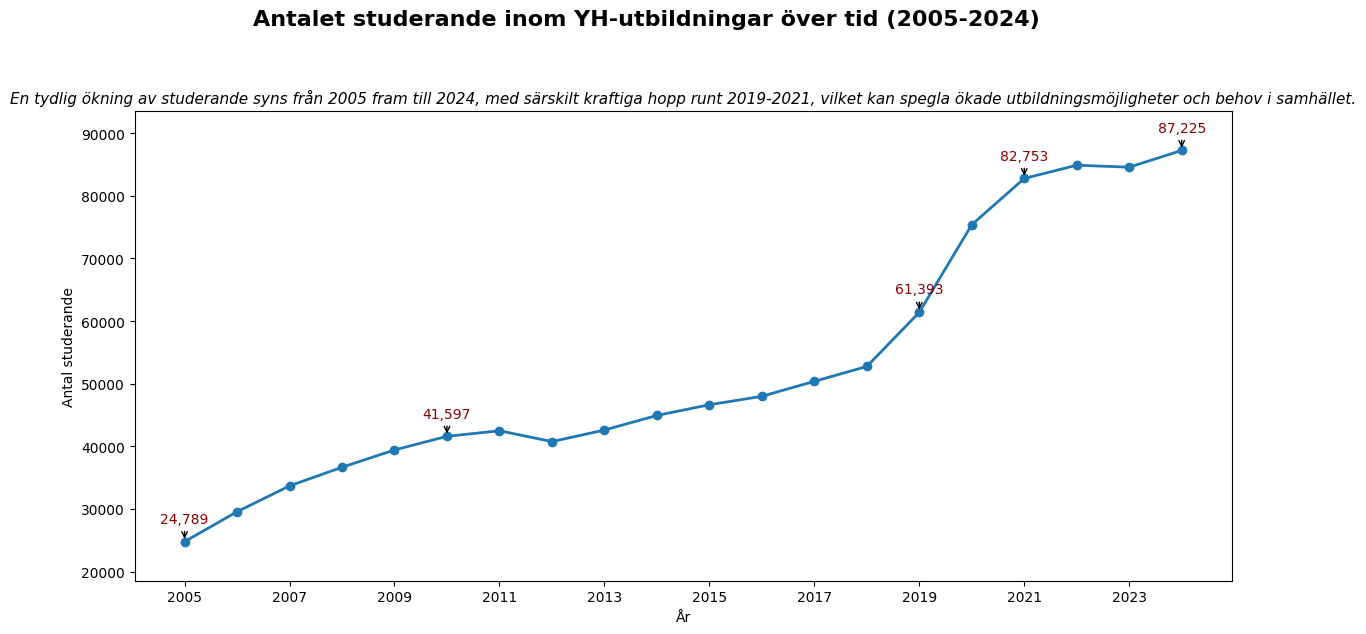

In [412]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in datan
data = pd.read_excel("data/Antalet studerande i YH inom olika utbildningsområden 2012-2024.xlsx")

# Konvertera kolumnen 'År' till sträng eller int om den inte är det
data['År'] = data['År'].astype(int)

# Skapa figur och axlar
fig, ax = plt.subplots(figsize=(12, 6))

# Plotta totalantalet studerande per år
ax.plot(data['År'], data['Totalt'], marker='o', color='tab:blue', linewidth=2)


plt.suptitle(title, fontsize=16, fontweight='bold', y=1.05)
plt.title(subtitle, fontsize=11, style='italic')

# X- och Y-axlar
ax.set_xlabel("År")
ax.set_ylabel("Antal studerande")
ax.set_xticks(data['År'][::2])  # Visa varannan år för bättre läsbarhet

# Ta bort grid för att rensa grafen
ax.grid(False)

# Annotationer för intressanta år
highlight_years = [2005, 2010, 2019, 2021, 2024]
for year in highlight_years:
    antal = data.loc[data['År'] == year, 'Totalt'].values[0]
    ax.annotate(f"{antal:,}", xy=(year, antal), xytext=(year, antal+3000),
                arrowprops=dict(facecolor='gray', arrowstyle="->"),
                ha='center', fontsize=10, color='darkred')

# Lite padding runt linjen
ax.margins(y=0.1)


plt.tight_layout()
plt.show()


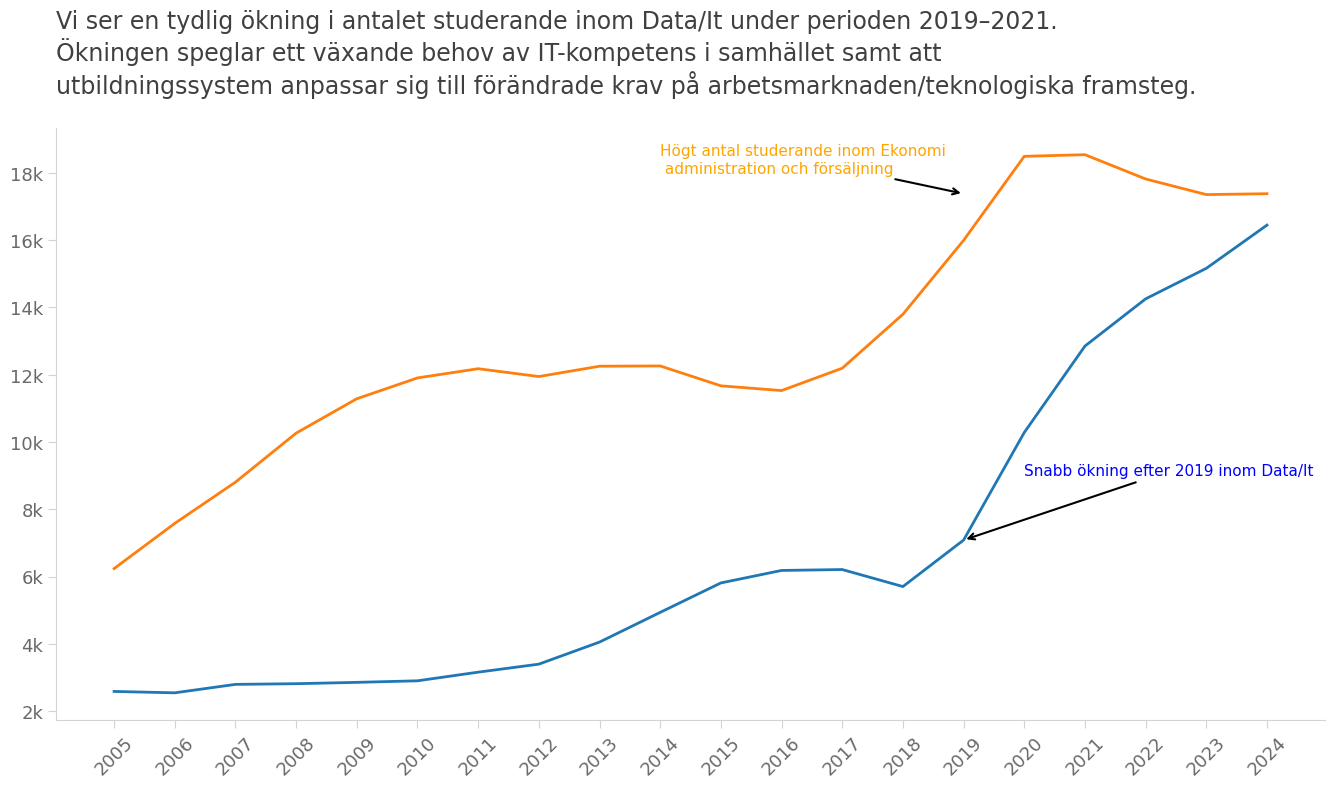

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = pd.read_excel("data/Antalet studerande i YH inom olika utbildningsområden 2012-2024.xlsx")

# Om nödvändigt, konvertera 'År' till strängar för enklare x-axel hantering
data["År"] = data["År"].astype(str)

# Välj intressanta områden för storytelling
selected_fields = [
    "Data/It", 
    "Ekonomi, administration och försäljning"
]

# Skapa grafen
plt.figure(figsize=(14, 8))
for field in selected_fields:
    plt.plot(data["År"], data[field], label=field, linewidth=2)

# Storytelling-annotationer
plt.annotate(
    "Snabb ökning efter 2019 inom Data/It", 
    xy=("2019", data.loc[data["År"] == "2019", "Data/It"].values[0]),
    xytext=("2020", 9000),
    arrowprops=dict(arrowstyle="->", lw=1.5), 
    fontsize=11, color="blue"
)

plt.annotate("Högt antal studerande inom Ekonomi\n administration och försäljning",
    xy=("2019", data.loc[data["År"] == "2024", "Ekonomi, administration och försäljning"].values[0]),
    xytext=("2014", 18000),
    arrowprops=dict(arrowstyle="->", lw=1.5), 
    fontsize=11, color="orange")

# Styling text 
plt.text(
    0, 1.05,
    s=(
        "Vi ser en tydlig ökning i antalet studerande inom Data/It under perioden 2019–2021.\n"
        "Ökningen speglar ett växande behov av IT-kompetens i samhället samt att\n" 
        "utbildningssystem anpassar sig till förändrade krav på arbetsmarknaden/teknologiska framsteg."
    ),
    fontsize=17,
    ha='left', va='bottom',
    color='#404040',
    transform=plt.gca().transAxes
)

#Tick design 
plt.xticks(rotation=45)
plt.gca().tick_params(axis='both', which='major', labelsize=13, labelcolor='dimgray')#  major tick labels
plt.gca().tick_params(axis='both', which='major', color='lightgray', length=6)#  major ticks color and size

# Format y-axis ticks to display in 'k'
formatter = FuncFormatter(lambda x, _: f"{int(x/1000)}k" if x >= 1000 else str(int(x)))
plt.gca().yaxis.set_major_formatter(formatter)


# Remove right and top spines
for spine in ['right', 'top']:
    plt.gca().spines[spine].set_visible(False)
# Set the remaining spines (left and bottom) to lighter gray
for spine in ['left', 'bottom']:
    plt.gca().spines[spine].set_color('lightgray')
    

plt.grid(False)
plt.tight_layout()

plt.savefig("figures/storytelling_Data_It.png")
plt.show()
